In [5]:
from headers import *
import sklearn.manifold as skl_manifold

In [6]:
weights1 = npy.load("Data/Mouse_Data/meta_weight_file.npy")
points1 = npy.load("Data/Mouse_Data/meta_point_file.npy")

In [17]:
number_trajectories = 20
number_segments = 19
number_samples = number_segments*number_trajectories
# number_samples = 34
number_kernels = 100
number_dimensions = 2
segment_length = 100

# This should be of the shape: Number_samples, Number_kernels, Number_Dimensions
# weights_2d = weights.reshape((weights.shape[0]*weights.shape[1],weights.shape[2]))
number_clusters = 40

In [18]:
# 153,244 ARE NANs

weights = npy.zeros((number_samples-2,number_kernels,number_dimensions))
points = npy.zeros((number_samples-2,segment_length,number_dimensions))

counter = 0
for i in range(number_samples):
    if (i!=153)and(i!=244):
        weights[counter]=weights1[i]
        points[counter]=points1[i]
        counter += 1
        
number_samples -= 2
weights_2d = weights.reshape(number_samples*number_kernels,2)

# plt.plot(weights_2d[:,0],weights_2d[:,1])
# plt.show()

In [19]:
kmeans = KMeans(n_clusters = number_clusters, random_state=0).fit(weights.reshape(number_samples,number_kernels*number_dimensions))

points_2d = points.reshape((points.shape[0]*points.shape[1],points.shape[2]))

labels = npy.zeros((number_samples, segment_length))
point_labels = npy.zeros((number_samples+2, segment_length))

In [20]:
for i in range(number_trajectories):
	for j in range(number_segments):    
		point_labels[number_segments*i+j,:] = i		

point_labels = point_labels.reshape((number_samples+2)*segment_length,1)
# labels = labels.reshape(number_samples*segment_length,1)


In [21]:
for i in range(number_samples):
    labels[i,:] = kmeans.labels_[i]
labels = labels.reshape(number_samples*segment_length,1)

In [22]:
plabels = npy.zeros(number_samples*segment_length)
counter = 0
for i in range(number_samples+2):
    if (i!=153)and(i!=244):
        plabels[counter] = point_labels[i]
        counter += 1

In [23]:
model = skl_manifold.TSNE(n_components=2,random_state=0)
embedded_weights = model.fit_transform(weights.reshape(number_samples,number_kernels*number_dimensions))

In [24]:
def plot_and_save(to_plot,color,title,name):
	plt.scatter(to_plot[:,0],to_plot[:,1],c=color,s=400)
	plt.title(str(title))
	plt.colorbar()
	manager = plt.get_current_fig_manager()
	manager.resize(*manager.window.maxsize())
	plt.show(block=False)
	plt.savefig(str(name),bbox_inches='tight')
	plt.close()

In [25]:
def jplot(to_plot,color,title):
# 	plt.scatter(to_plot[:,0],to_plot[:,1],c=color,s=400)
	plt.scatter(to_plot[:,0],to_plot[:,1],c=color,s=50)
	plt.title(str(title))
	plt.colorbar()
# 	manager = plt.get_current_fig_manager()
# 	manager.resize(*manager.window.maxsize())
	plt.show()	

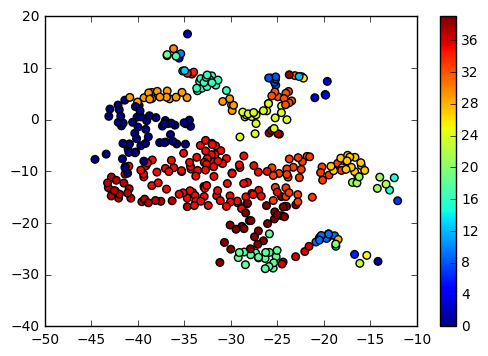

In [29]:
plt.scatter(embedded_weights[:,0],embedded_weights[:,1],c=kmeans.labels_,s=30)
plt.colorbar()
plt.show()

In [41]:
kmeans.cluster_centers_.shape

# model = skl_manifold.TSNE(n_components=2,random_state=0)
embedded_centers = model.fit_transform(kmeans.cluster_centers_)
# embedded_weights = model.fit_transform(weights.reshape(number_samples,number_kernels*number_dimensions))
# plt.close()
# plt.scatter(embedded_centers[:,0],embedded_centers[:,1],s=30, c=range(40))
# plt.colorbar()
# plt.show()

with file("cluster_centers.npy",'w') as outfile:
    npy.save(outfile,kmeans.cluster_centers_)

In [73]:
def ALL_plot_and_save():
	plot_and_save(points_2d, point_labels, "Trajectory Data Points.", "Original_Trajectories.png")
	plot_and_save(points_2d, labels, "Clustered Data Points.", "Clustered_Trajectories.png")
	plot_and_save(weights_2d, labels, "Clustered DMP Weights.", "Clustered_Weights.png")
	plot_and_save(weights_2d, point_labels, "Weights by Segment.", "Segment_Weights.png")
	plot_and_save(embedded_weights, kmeans.labels_, "Embedded Weights using TSNE.", "Embedded_Weights.png")	

In [105]:
def ALL_plot():
	jplot(points_2d, plabels, "Trajectory Data Points.")
	jplot(points_2d, labels, "Clustered Data Points.")
	jplot(weights_2d, labels, "Clustered DMP Weights.")
	jplot(weights_2d, plabels, "Weights by Segment.")
# 	jplot(embedded_weights, kmeans.labels_, "Embedded Weights using TSNE.")


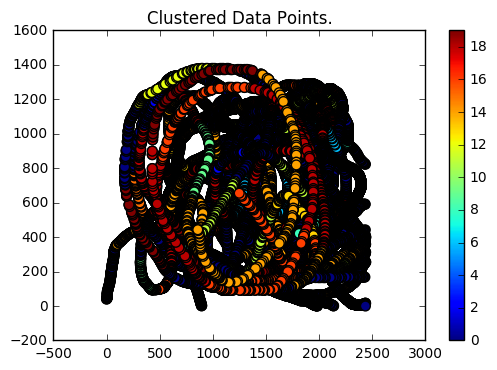

In [120]:
# plt.scatter(points_2d[:,0],points_2d[:,1],c=plabels,s=50)
# plt.show()
jplot(points_2d, labels, "Clustered Data Points.")

In [125]:
for j in range(0,number_clusters):
	fig,ax = plt.subplots()
# 	plt.ylim((0,2000))
# 	plt.xlim((0,2000))
	plt.scatter(points_2d[npy.where(labels==j)[0],0],points_2d[npy.where(labels==j)[0],1],c=point_labels[npy.where(labels==j)[0]],s=50)
	# plt.scatter(points_2d[n_componentsy.where(labels==j)[0],0],points_2d[npy.where(labels==j)[0],1],s=200)
	plt.title("Cluster {0}.".format(j))
	# manager = plt.get_current_fig_manager()	
	# manager.resize(*manager.window.maxsize())
	plt.colorbar()
	# plt.show(block=False)
	plt.savefig("Cluster_{0}.png".format(j),bbox_inches='tight')		
	plt.close()

In [127]:
labels.max()

19.0